In [1]:
# Data の読み込み

import pandas as pd

uriage_data = pd.read_csv('sample_code/chapter_2/uriage.csv')
uriage_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
1,2019-07-13 13:05:29,商 品 S,NaN,浅田賢二
2,2019-05-11 19:42:07,商 品 a,NaN,南部慶二
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒
4,2019-04-22 03:09:35,商品a,NaN,平田鉄二


In [2]:
kokyaku_data = pd.read_excel('sample_code/chapter_2/kokyaku_daicho.xlsx')
kokyaku_data.head()

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018/01/04
1,岡田 敏也,おかだ としや,E市,okada_toshiya@example.com,42782
2,芳賀 希,はが のぞみ,A市,haga_nozomi@example.com,2018/01/07
3,荻野 愛,おぎの あい,F市,ogino_ai@example.com,42872
4,栗田 憲一,くりた けんいち,E市,kurita_kenichi@example.com,43127


Data に欠損値や表記の整合性がない事が散見され Data の揺れが起こっている。

In [3]:
uriage_data['item_name'].head()

0      商品A
1    商 品 S
2    商 品 a
3      商品Z
4      商品a
Name: item_name, dtype: object

Data に Space が含まれていたり Alphabet が小文字になっている。
このまま Data 分析を行ってしまうと本来一つの商品である「商品A」の正確な集計がとれないことが予想される。

In [4]:
uriage_data['item_price'].head()

0     100.0
1       NaN
2       NaN
3    2600.0
4       NaN
Name: item_price, dtype: float64

欠損値「NaN」が確認できる。

In [5]:
uriage_data['purchase_date'] = pd.to_datetime(uriage_data['purchase_date'])
uriage_data['purchase_month'] = uriage_data['purchase_date'].dt.strftime('%Y%m')
res = uriage_data.pivot_table(index='purchase_month', columns='item_name', aggfunc='size', fill_value=0)
res

item_name,商品W,商 品 n,商品E,商品M,商品P,商品S,商品W,商品X,商 品O,商 品Q,...,商品k,商品l,商品o,商品p,商品r,商品s,商品t,商品v,商品x,商品y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0
201903,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
201905,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
201906,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
201907,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,2,0,0,0,0,0


Data の揺れにより下記事項が起こっていることが確認できる。
- 商品S や 商品s 等、本来同じ商品が別の商品として集計されている。
- 本来26個の商品が99個商品に増えてしまっている。

In [6]:
res = uriage_data.pivot_table(index='purchase_month', columns='item_name', values='item_price', aggfunc='sum',
                              fill_value=0)
res

item_name,商品W,商 品 n,商品E,商品M,商品P,商品S,商品W,商品X,商 品O,商 品Q,...,商品k,商品l,商品o,商品p,商品r,商品s,商品t,商品v,商品x,商品y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,0,1400,0,0,0,0,0,0,0,0,...,1100,1200,1500,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,0,2400,0,0,...,0,0,0,0,0,1900,2000,2200,0,0
201903,0,0,500,1300,1600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,2300,0,0,0,0,0,0,0,0,1700,...,0,0,0,0,0,1900,0,0,0,0
201905,0,0,0,0,0,1900,0,0,0,0,...,0,1200,0,0,0,0,0,0,0,2500
201906,0,0,0,0,0,0,2300,0,0,0,...,0,0,0,1600,0,0,0,0,2400,0
201907,0,0,0,0,0,0,0,0,0,0,...,0,0,1500,0,1800,0,0,0,0,0


item_price も Data の揺れにより正しい集計結果になっていないことを確認。

In [7]:
# 商品名の揺れを補正する

# 売上履歴の item_name の重複を除外した Unique な Data 件数を確認とる。
print(len(pd.unique(uriage_data.item_name)))

99


In [8]:
uriage_data['item_name'] = uriage_data['item_name'].str.upper()  # 小文字を大文字へ変換
uriage_data['item_name'] = uriage_data['item_name'].str.replace('　', '')  # 全角 Space を削除
uriage_data['item_name'] = uriage_data['item_name'].str.replace(' ', '')  # 半角 Space を削除
uriage_data.sort_values(by=['item_name'], ascending=True)  # item_name 順に Sort して出力

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,201906
1748,2019-05-19 20:22:22,商品A,100.0,松川綾女,201905
223,2019-06-25 08:13:20,商品A,100.0,板橋隆,201906
1742,2019-06-13 16:03:17,商品A,100.0,小平陽子,201906
1738,2019-02-10 00:28:43,商品A,100.0,松田浩正,201902
...,...,...,...,...,...
2880,2019-04-22 00:36:52,商品Y,NaN,田辺光洋,201904
2881,2019-04-30 14:21:09,商品Y,NaN,高原充則,201904
1525,2019-01-24 10:27:23,商品Y,2500.0,五十嵐春樹,201901
1361,2019-05-28 13:45:32,商品Y,2500.0,大崎ヒカル,201905


In [9]:
# unique()関数で商品名の一覧とその数を取得し結果を検証する
print(pd.unique(uriage_data['item_name']))
print(len(pd.unique(uriage_data['item_name'])))

['商品A' '商品S' '商品Z' '商品V' '商品O' '商品U' '商品L' '商品C' '商品I' '商品R' '商品X' '商品G'
 '商品P' '商品Q' '商品Y' '商品N' '商品W' '商品E' '商品K' '商品B' '商品F' '商品D' '商品M' '商品H'
 '商品T' '商品J']
26


- A~Zの商品に統一
- 件数: 26件

商品名における Data の揺れが解消されたことを確認。

In [10]:
# 金額欠損値の補完

uriage_data.isnull().any(axis=0)  # isnull()関数で欠損値の有無を確認

purchase_date     False
item_name         False
item_price         True
customer_name     False
purchase_month    False
dtype: bool

"item_price True" となっている為、金額項目に欠損値が含まれていると確認。

In [11]:
for trg in list(uriage_data['item_name'].sort_values().unique()):
    max_amount = str(uriage_data.loc[uriage_data['item_name'] == trg]['item_price'].max())
    min_amount = str(uriage_data.loc[uriage_data['item_name'] == trg]['item_price'].min(skipna=False))
    print(f'{trg}の最大額: {max_amount}の最少額: {min_amount}')

商品Aの最大額: 100.0の最少額: nan
商品Bの最大額: 200.0の最少額: nan
商品Cの最大額: 300.0の最少額: nan
商品Dの最大額: 400.0の最少額: nan
商品Eの最大額: 500.0の最少額: nan
商品Fの最大額: 600.0の最少額: nan
商品Gの最大額: 700.0の最少額: nan
商品Hの最大額: 800.0の最少額: nan
商品Iの最大額: 900.0の最少額: nan
商品Jの最大額: 1000.0の最少額: nan
商品Kの最大額: 1100.0の最少額: nan
商品Lの最大額: 1200.0の最少額: nan
商品Mの最大額: 1300.0の最少額: nan
商品Nの最大額: 1400.0の最少額: nan
商品Oの最大額: 1500.0の最少額: nan
商品Pの最大額: 1600.0の最少額: nan
商品Qの最大額: 1700.0の最少額: nan
商品Rの最大額: 1800.0の最少額: nan
商品Sの最大額: 1900.0の最少額: nan
商品Tの最大額: 2000.0の最少額: nan
商品Uの最大額: 2100.0の最少額: nan
商品Vの最大額: 2200.0の最少額: nan
商品Wの最大額: 2300.0の最少額: nan
商品Xの最大額: 2400.0の最少額: nan
商品Yの最大額: 2500.0の最少額: nan
商品Zの最大額: 2600.0の最少額: 2600.0


最小値が、ほぼ NaN になり Data が欠損されていることを改めて確認。

In [12]:
# 集計期間中に商品単価の変動はない、とう前提がある為、欠損値について他の同じ商品の単価より補完していく。

# item_price 内の欠損値のある箇所を特定し flg_is_null 変数にどの行に欠損値が存在するのか保持
flg_is_null = uriage_data['item_price'].isnull()
# 欠損値の存在する商品名を抽出し List 化して Loop 処理を行う。
for trg in list(uriage_data.loc[flg_is_null, 'item_name'].unique()):
    # 欠損値がある商品と同じ商品 Data から金額を取得。
    price = uriage_data.loc[(~flg_is_null) & (uriage_data['item_name'] == trg), 'item_price'].max()
    # 欠損を起こしている大賞 Data を抽出し、price で欠損値に代入
    uriage_data['item_price'].loc[flg_is_null & (uriage_data['item_name'] == trg)] = price
uriage_data.head()

/home/tera/.local/share/virtualenvs/data_analysis_100_knock-wqHqPzKa/lib/python3.10/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,201906
1,2019-07-13 13:05:29,商品S,1900.0,浅田賢二,201907
2,2019-05-11 19:42:07,商品A,100.0,南部慶二,201905
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒,201902
4,2019-04-22 03:09:35,商品A,100.0,平田鉄二,201904


In [13]:
uriage_data.isnull().any(axis=0)

purchase_date     False
item_name         False
item_price        False
customer_name     False
purchase_month    False
dtype: bool

"item_price False" より金額欠損がなくなった事を確認。

In [14]:
for trg in list(uriage_data['item_name'].sort_values().unique()):
    max_amount = str(uriage_data.loc[uriage_data['item_name'] == trg]['item_price'].max())
    min_amount = str(uriage_data.loc[uriage_data['item_name'] == trg]['item_price'].min(skipna=False))
    print(f'{trg}の最大額: {max_amount}の最少額: {min_amount}')

商品Aの最大額: 100.0の最少額: 100.0
商品Bの最大額: 200.0の最少額: 200.0
商品Cの最大額: 300.0の最少額: 300.0
商品Dの最大額: 400.0の最少額: 400.0
商品Eの最大額: 500.0の最少額: 500.0
商品Fの最大額: 600.0の最少額: 600.0
商品Gの最大額: 700.0の最少額: 700.0
商品Hの最大額: 800.0の最少額: 800.0
商品Iの最大額: 900.0の最少額: 900.0
商品Jの最大額: 1000.0の最少額: 1000.0
商品Kの最大額: 1100.0の最少額: 1100.0
商品Lの最大額: 1200.0の最少額: 1200.0
商品Mの最大額: 1300.0の最少額: 1300.0
商品Nの最大額: 1400.0の最少額: 1400.0
商品Oの最大額: 1500.0の最少額: 1500.0
商品Pの最大額: 1600.0の最少額: 1600.0
商品Qの最大額: 1700.0の最少額: 1700.0
商品Rの最大額: 1800.0の最少額: 1800.0
商品Sの最大額: 1900.0の最少額: 1900.0
商品Tの最大額: 2000.0の最少額: 2000.0
商品Uの最大額: 2100.0の最少額: 2100.0
商品Vの最大額: 2200.0の最少額: 2200.0
商品Wの最大額: 2300.0の最少額: 2300.0
商品Xの最大額: 2400.0の最少額: 2400.0
商品Yの最大額: 2500.0の最少額: 2500.0
商品Zの最大額: 2600.0の最少額: 2600.0


すべての商品の最大と最小が一致している事を確認。

In [15]:
# 顧客名の揺れを補正する

# 顧客台帳の顧客名を確認
kokyaku_data['顧客名'].head()

0     須賀ひとみ
1    岡田　 敏也
2      芳賀 希
3     荻野  愛
4     栗田 憲一
Name: 顧客名, dtype: object

In [16]:
# 売上履歴の顧客名を確認
uriage_data['customer_name'].head()

0    深井菜々美
1     浅田賢二
2     南部慶二
3     麻生莉緒
4     平田鉄二
Name: customer_name, dtype: object

- 顧客台帳には姓名の間に Space が含まれているが売上履歴の顧客名には Space が含まれていない。
- 顧客台帳の顧客名の Space は
    - 全角・半角が混じっていいる
    - Space がない

  など書式が混在している。

顧客名以外に２つの Data をつなげる Key がない為、顧客名の補正は必須となる。

In [17]:
# 顧客台帳の顧客名に対しての Space を除去する
kokyaku_data['顧客名'] = kokyaku_data['顧客名'].str.replace('　', '')
kokyaku_data['顧客名'] = kokyaku_data['顧客名'].str.replace(' ', '')
kokyaku_data['顧客名'].head()

0    須賀ひとみ
1     岡田敏也
2      芳賀希
3      荻野愛
4     栗田憲一
Name: 顧客名, dtype: object

In [18]:
# 日付の揺れを補正する

# 顧客台帳の内容を再確認する
kokyaku_data.head()

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018/01/04
1,岡田敏也,おかだ としや,E市,okada_toshiya@example.com,42782
2,芳賀希,はが のぞみ,A市,haga_nozomi@example.com,2018/01/07
3,荻野愛,おぎの あい,F市,ogino_ai@example.com,42872
4,栗田憲一,くりた けんいち,E市,kurita_kenichi@example.com,43127


登録費に日付でない数字が散見される。
取り込み元の Excel Data を直接確認していみる。

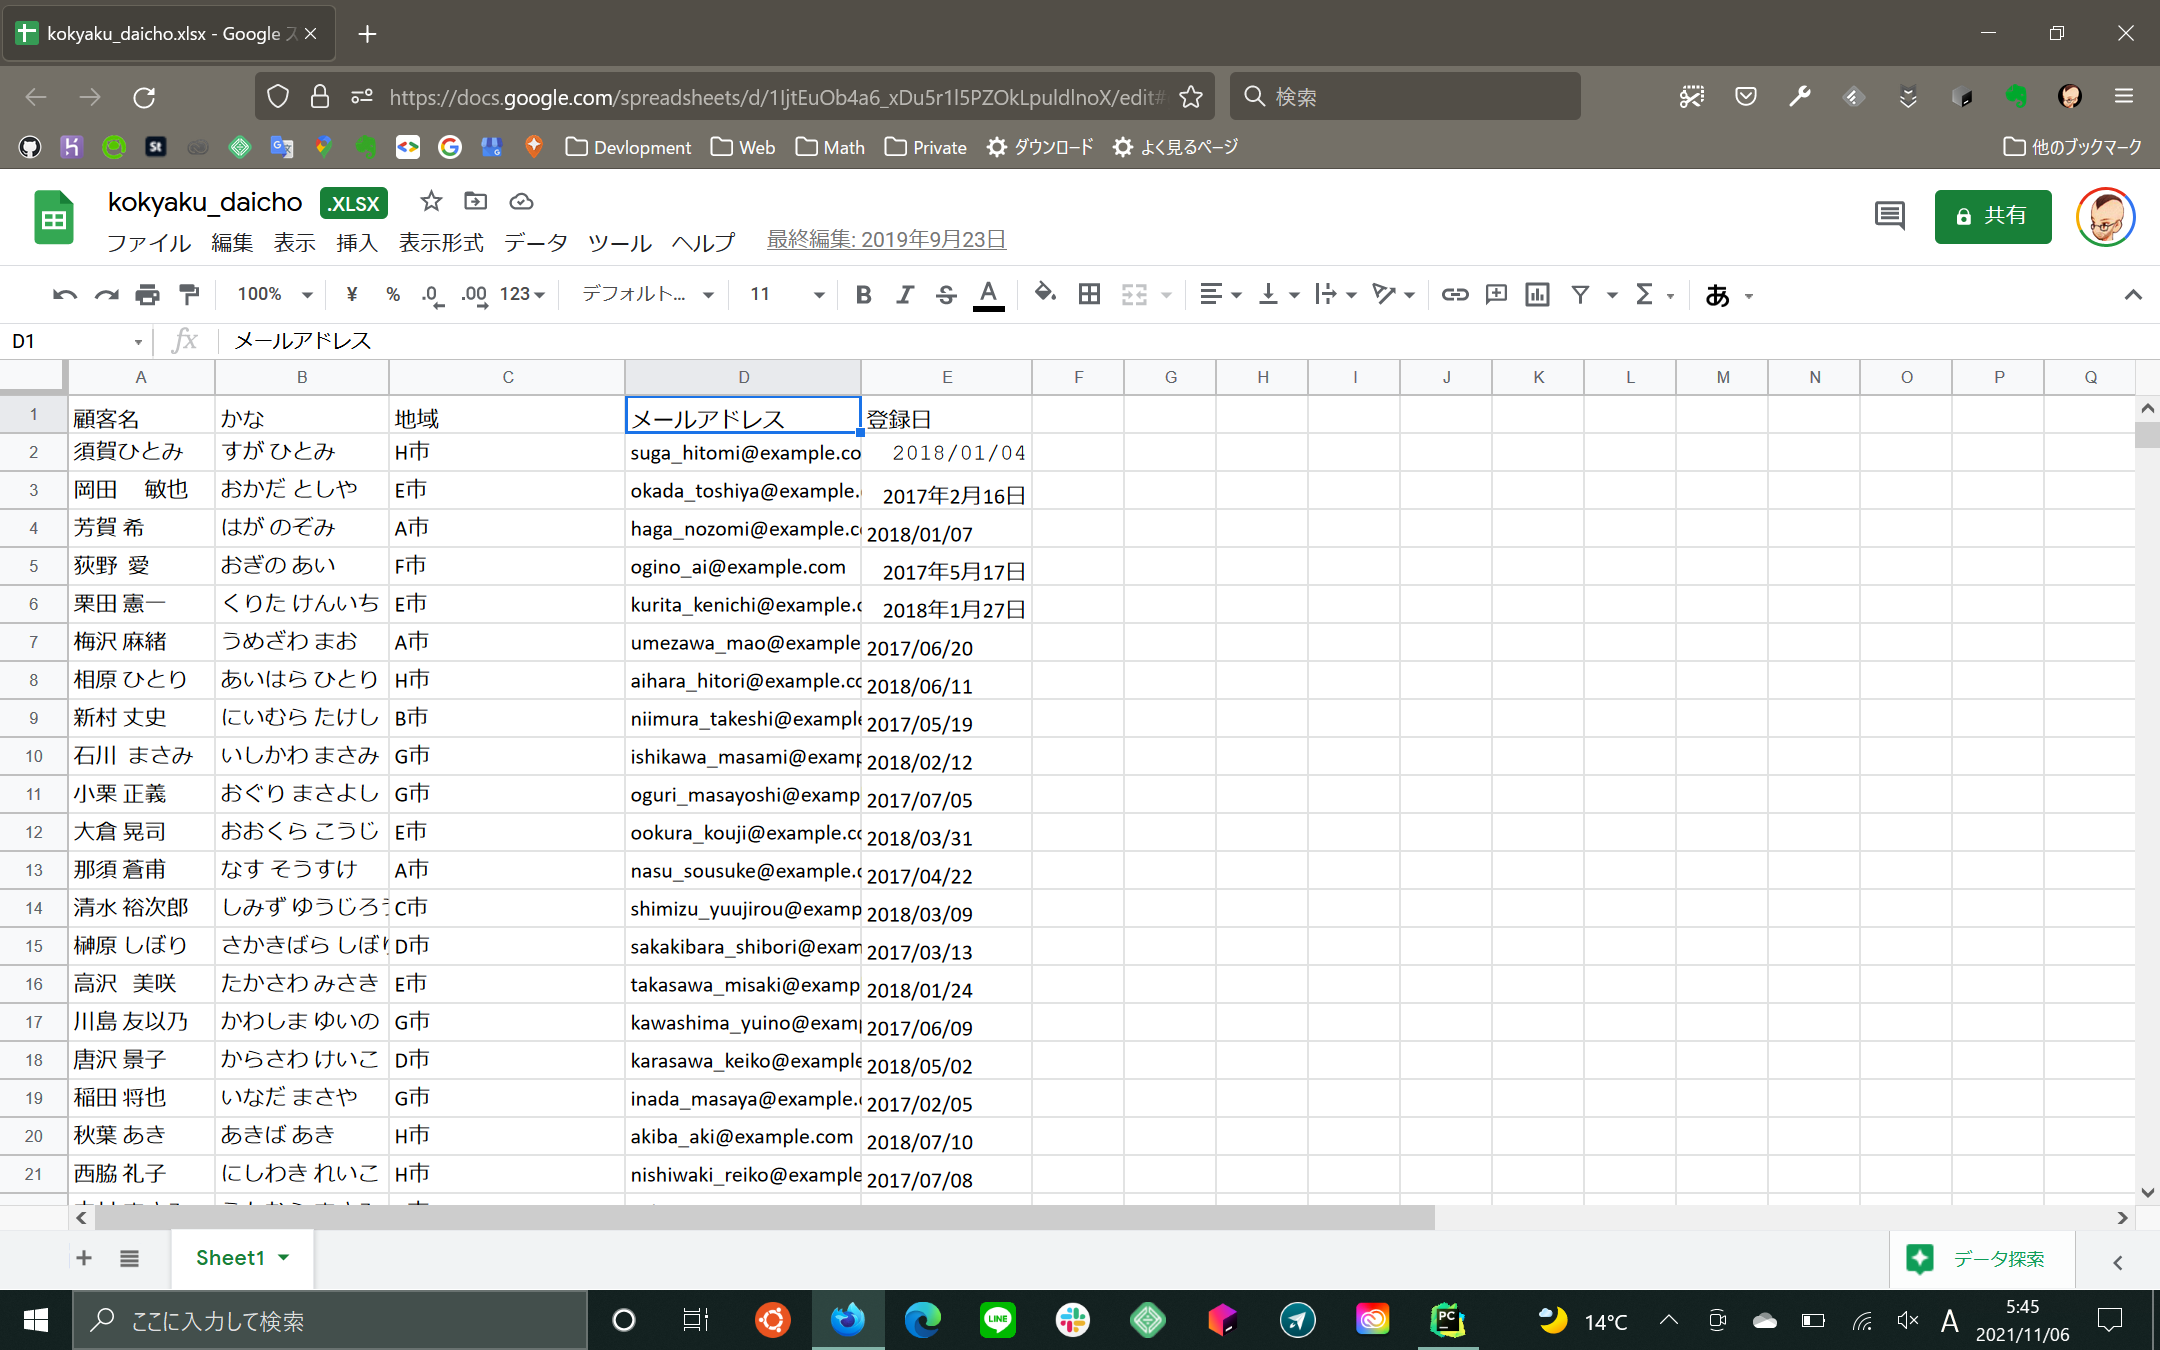

In [19]:
from PIL import Image

img = Image.open('schreenshot/2021-11-06.png')
img.show()

Excel Data において登録日に違う書式がの日付が混在していることを確認。

In [20]:
# 登録日が数字になっている箇所を特定し対象 Data を変数に格納
flg_is_serial = kokyaku_data['登録日'].astype('str').str.isdigit()

flg_is_serial.sum()
# 登録日が数字になっている件数

22

In [21]:
# 数字で取り込まれている登録日を補正。
fromSerial = pd.to_timedelta(kokyaku_data.loc[flg_is_serial, '登録日'].astype('float'), unit='D') + pd.to_datetime(
    '1900/01/01')
fromSerial
# Excel と Python の Serial 値の取り扱い方の違いで２日ずれる

1     2017-02-18
3     2017-05-19
4     2018-01-29
21    2017-07-06
27    2017-06-17
47    2017-01-08
49    2017-07-15
53    2017-04-10
76    2018-03-31
80    2018-01-12
99    2017-06-01
114   2018-06-05
118   2018-01-31
122   2018-04-18
139   2017-05-27
143   2017-03-26
155   2017-01-21
172   2018-03-24
179   2017-01-10
183   2017-07-26
186   2018-07-15
192   2018-06-10
Name: 登録日, dtype: datetime64[ns]

In [22]:
# すでに日付 Data として取り込まれている Data も書式を統一する
frommString = pd.to_datetime(kokyaku_data.loc[~flg_is_serial, '登録日'])
frommString
# 「/ 区切り」「- 区切り」へ統一

0     2018-01-04
2     2018-01-07
5     2017-06-20
6     2018-06-11
7     2017-05-19
         ...    
195   2017-06-20
196   2018-06-20
197   2017-04-29
198   2019-04-19
199   2019-04-23
Name: 登録日, Length: 178, dtype: datetime64[ns]

In [23]:
# 補正 Data を結合する
kokyaku_data['登録日'] = pd.concat([fromSerial, frommString])
kokyaku_data

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018-01-04
1,岡田敏也,おかだ としや,E市,okada_toshiya@example.com,2017-02-18
2,芳賀希,はが のぞみ,A市,haga_nozomi@example.com,2018-01-07
3,荻野愛,おぎの あい,F市,ogino_ai@example.com,2017-05-19
4,栗田憲一,くりた けんいち,E市,kurita_kenichi@example.com,2018-01-29
...,...,...,...,...,...
195,川上りえ,かわかみ りえ,G市,kawakami_rie@example.com,2017-06-20
196,小松季衣,こまつ としえ,E市,komatsu_toshie@example.com,2018-06-20
197,白鳥りえ,しらとり りえ,F市,shiratori_rie@example.com,2017-04-29
198,大西隆之介,おおにし りゅうのすけ,H市,oonishi_ryuunosuke@example.com,2019-04-19


In [24]:
# 登録日から登録月を算出し、集計してみる
kokyaku_data['登録年月'] = kokyaku_data['登録日'].dt.strftime('%Y%m')
rslt = kokyaku_data.groupby('登録年月').count()['顧客名']
print(rslt)
print(f'顧客 data の Record 数: {len(kokyaku_data)}')
print(f'年月単位で集計結果を足し算した結果: {rslt.sum()}')

登録年月
201701    15
201702    11
201703    14
201704    15
201705    13
201706    14
201707    17
201801    13
201802    15
201803    17
201804     5
201805    19
201806    13
201807    17
201904     2
Name: 顧客名, dtype: int64
顧客 data の Record 数: 200
年月単位で集計結果を足し算した結果: 200


顧客台帳の Data 件数と年月単位での集計結果の合計が「200」で合致していることを確認。

In [25]:
# 登録日に数字が残っていないか再確認

flg_is_serial = kokyaku_data['登録日'].astype('str').str.isdigit()
flg_is_serial.sum()

0

22件だった結果が「0件」になり、すべての数値 Data が日付に補正されたことを確認。

In [27]:
# 顧客名を Key に２つの Data を結合(Join)する

join_data = pd.merge(uriage_data, kokyaku_data, left_on='customer_name', right_on='顧客名', how='left')
join_data = join_data.drop('customer_name', axis=1)
join_data

,purchase_date,item_name,item_price,purchase_month,顧客名,かな,地域,メールアドレス,登録日,登録年月
0,2019-06-13 18:02:34,商品A,100.0,201906,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26,201701
1,2019-07-13 13:05:29,商品S,1900.0,201907,浅田賢二,あさだ けんじ,C市,asada_kenji@example.com,2018-04-07,201804
2,2019-05-11 19:42:07,商品A,100.0,201905,南部慶二,なんぶ けいじ,A市,nannbu_keiji@example.com,2018-06-19,201806
3,2019-02-12 23:40:45,商品Z,2600.0,201902,麻生莉緒,あそう りお,D市,asou_rio@example.com,2018-07-22,201807
4,2019-04-22 03:09:35,商品A,100.0,201904,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07,201706
...,...,...,...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:39,商品Y,2500.0,201902,福島友也,ふくしま ともや,B市,fukushima_tomoya@example.com,2017-07-01,201707
2995,2019-06-22 04:03:43,商品M,1300.0,201906,大倉晃司,おおくら こうじ,E市,ookura_kouji@example.com,2018-03-31,201803
2996,2019-03-29 11:14:05,商品Q,1700.0,201903,尾形小雁,おがた こがん,B市,ogata_kogan@example.com,2017-03-15,201703
2997,2019-07-14 12:56:49,商品H,800.0,201907,芦田博之,あしだ ひろゆき,E市,ashida_hiroyuki@example.com,2018-07-15,201807


In [28]:
# Cleansing した Data を Dump する

# purchase_date と purchase_month が近くにくるように整形する
dump_data = join_data[['purchase_date', 'purchase_month', 'item_name', 'item_price', '顧客名', 'かな', '地域', 'メールアドレス', '登録日']]
dump_data

,purchase_date,purchase_month,item_name,item_price,顧客名,かな,地域,メールアドレス,登録日
0,2019-06-13 18:02:34,201906,商品A,100.0,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26
1,2019-07-13 13:05:29,201907,商品S,1900.0,浅田賢二,あさだ けんじ,C市,asada_kenji@example.com,2018-04-07
2,2019-05-11 19:42:07,201905,商品A,100.0,南部慶二,なんぶ けいじ,A市,nannbu_keiji@example.com,2018-06-19
3,2019-02-12 23:40:45,201902,商品Z,2600.0,麻生莉緒,あそう りお,D市,asou_rio@example.com,2018-07-22
4,2019-04-22 03:09:35,201904,商品A,100.0,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07
...,...,...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:39,201902,商品Y,2500.0,福島友也,ふくしま ともや,B市,fukushima_tomoya@example.com,2017-07-01
2995,2019-06-22 04:03:43,201906,商品M,1300.0,大倉晃司,おおくら こうじ,E市,ookura_kouji@example.com,2018-03-31
2996,2019-03-29 11:14:05,201903,商品Q,1700.0,尾形小雁,おがた こがん,B市,ogata_kogan@example.com,2017-03-15
2997,2019-07-14 12:56:49,201907,商品H,800.0,芦田博之,あしだ ひろゆき,E市,ashida_hiroyuki@example.com,2018-07-15


In [34]:
# CSV File に出力する
dump_data.to_csv('dump/dump_data.csv', index=False)